## DataSet 1

#### Importing Dataset

In [114]:
import pandas as pd

df = pd.read_pickle("/kaggle/input/dataset-for-dbscan/dbscan2000.pkl") 
df

array([[-2.73226642,  0.11453887],
       [-0.22062047,  0.99308232],
       [ 3.3841416 , -0.95665906],
       ...,
       [ 3.56339167,  0.43936267],
       [-3.59822956,  0.1965186 ],
       [ 4.02733159, -0.19364141]])

In [115]:
len(df)

2000

#### Plotting the given data

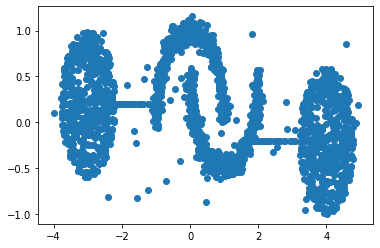

In [116]:
import matplotlib.pyplot as plt
plt.scatter(df[:,0] , df[:,1])

### Defining Function to find - **core** , **boundary** , **outlier** points

In [117]:
eps = 0.1
minpt = 5


def core_bound_outlr(eps , minpt , df):


  #core points
  core = []
  dict_neb = {}
  for i in range(0,len(df)):
    # i = 0
    neb = [j for j in range(0,len(df)) if math.dist(df[i],df[j]) <= eps]
    
    dict_neb[i] = list(set(neb) - set([i]))
    if len(neb) >= minpt:
      core.append(i)

  bound = []
  bound_outlr = list(set(range(0,len(df))) - set(core))
  for k in bound_outlr:
    if len(set(dict_neb[k]).intersection(set(core))) > 0 :
      bound.append(k)


  outlr = list(set(range(0,len(df))) - set(core) - set(bound))

  return core , bound , outlr , dict_neb

### Plotting  **core** , **boundary** , **outlier** points

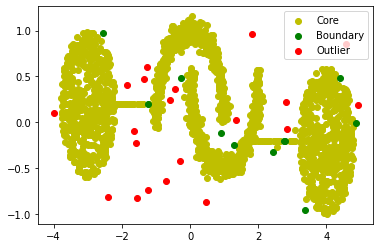

In [120]:
eps = 0.15
minpt = 5
core , bound , outlr , dict_neb = core_bound_outlr(eps , minpt , df)
plt.scatter(df[core][:,0] , df[core][:,1], c = "y")
plt.scatter(df[bound][:,0] , df[bound][:,1] ,c = "g")
plt.scatter(df[outlr][:,0] , df[outlr][:,1] ,c = "r")
plt.legend(["Core","Boundary","Outlier"])

### Defining function for **DBSCAN Algorithm**

In [47]:
label = [None]*len(df)
curr_lab = 0
prev_pos = []


def dbscanl(points , curr_lab , prev_pos , label):

  for l in points:

    if label[l] == None:
      curr_lab += 1
      label[l] = curr_lab

    for m in dict_neb[l]:
      if label[m] == None:
        # print("m",m)
        label[m] = curr_lab
    cor_neb = list( set(dict_neb[l]).intersection(set(core)))

    cor_neb = list(set(cor_neb)-set(prev_pos))

    prev_pos.append(l)
    cor_neb_prev = points[1:]

    if len(cor_neb) > 0:
      cor_neb , curr_lab , prev_pos , label = dbscanl(cor_neb,curr_lab, prev_pos, label)

  return cor_neb  , curr_lab , prev_pos , label

      

cor_neb , curr_lab , prev_pos , label = dbscanl(core , curr_lab , prev_pos, label)

label

label1 = [100 if v is None else v for v in label]
np.unique(label1)


array([  1,   2,   3,   4,   5,   6,   7,   8,   9, 100])

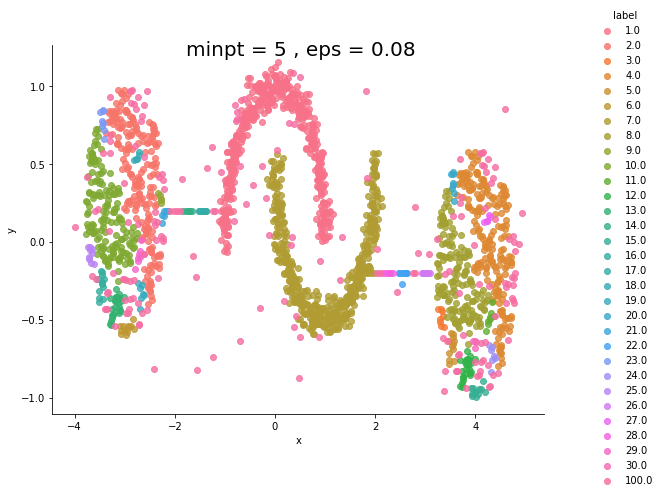

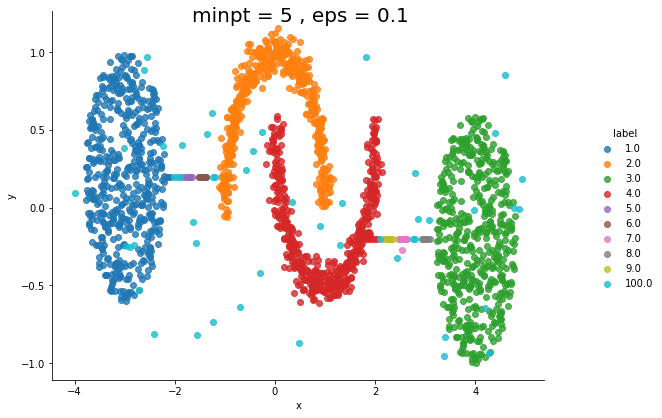

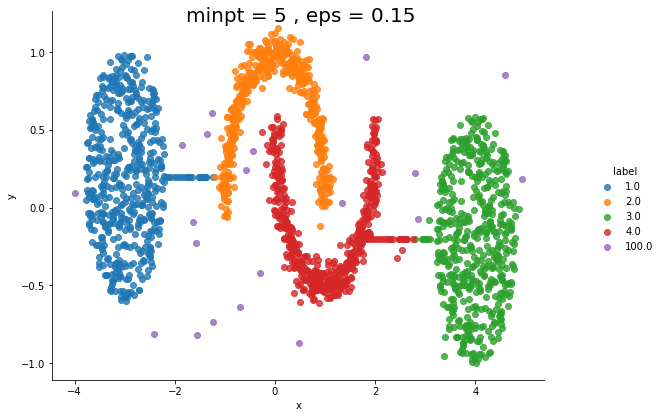

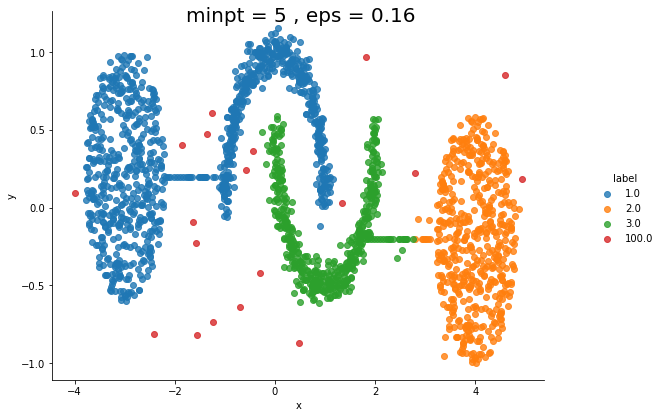

In [132]:
import seaborn as sns

minpt = 5

all_leb = []
all_df = []
for j in [0.08,0.1,0.15,0.16]:  

  eps = j
  core , bound , outlr , dict_neb = core_bound_outlr(eps , minpt , df)

  label = [None]*len(df)
  curr_lab = 0
  prev_pos = []

  cor_neb , curr_lab , prev_pos , label = dbscanl(core , curr_lab , prev_pos, label)

  label1 = [100 if v is None else v for v in label]

  all_leb.append(label1)

  import numpy as np
  data_f = pd.DataFrame(np.concatenate((df,np.array([label1]).T), axis = 1), columns = ["x","y","label"])
  data_f

  all_df.append(data_f)

  # NOTE

  sns.lmplot(x = 'x',y = 'y',data = data_f, hue='label', fit_reg=False)
  fig = plt.gcf()
  fig.set_size_inches(10, 6)

  # Add a title to the Figure
  fig.suptitle(f"minpt = {minpt} , eps = {eps}", fontsize=20)
  plt.show()




## Best paramter (minpt , eps) for 4 clusters 

### Clustered Data with label

In [121]:
# minpts = 5 , eps = 0.15
import numpy as np
data_f = pd.DataFrame(np.concatenate((df,np.array([all_leb[2]]).T), axis = 1), columns = ["x","y","label"])
data_f


,x,y,label
0,-2.732266,0.114539,1.0
1,-0.220620,0.993082,2.0
2,3.384142,-0.956659,3.0
3,-3.318088,0.828219,1.0
4,-3.049270,0.906074,1.0
...,...,...,...
1995,3.980801,-0.018302,3.0
1996,-2.945209,0.596871,1.0
1997,3.563392,0.439363,3.0
1998,-3.598230,0.196519,1.0


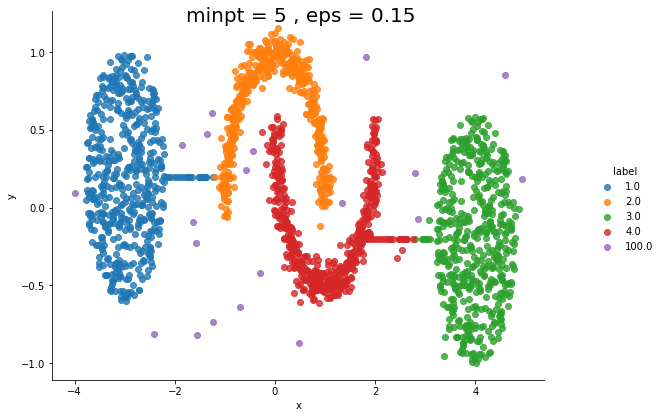

In [133]:
  sns.lmplot(x = 'x',y = 'y',data = all_df[2], hue='label', fit_reg=False)
  fig = plt.gcf()
  fig.set_size_inches(10, 6)

  # Add a title to the Figure
  fig.suptitle(f"minpt = 5 , eps = 0.15", fontsize=20)
  plt.show()

## we can see that Data has been clustered into 4 groups , when **eps - 0.15** , **minpts = 5**

## Note : label = 100 is **outliers**

# Dataset 2

### importing Data

In [122]:
df2 = pd.read_csv("/kaggle/input/dataset-for-dbscan/Clustering_gmm (2).csv")
df2

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


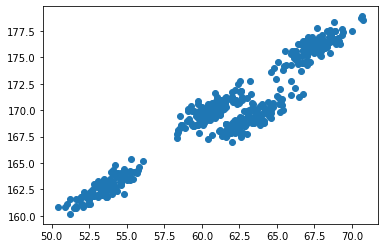

In [123]:
import matplotlib.pyplot as plt
plt.scatter(df2["Weight"],df2["Height"])

### Plotting  **core** , **boundary** , **noise** points

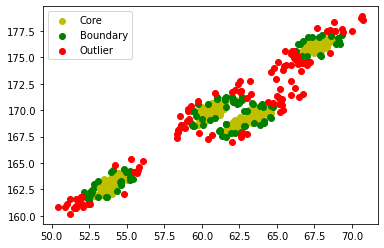

In [131]:
eps = 0.5
minpt = 10
core , bound , outlr , dict_neb = core_bound_outlr(eps , minpt , np.array(df2))
df2 = np.array(df2)
plt.scatter(df2[core][:,0] , df2[core][:,1], c = "y")
plt.scatter(df2[bound][:,0] , df2[bound][:,1] ,c = "g")
plt.scatter(df2[outlr][:,0] , df2[outlr][:,1] ,c = "r")
plt.legend(["Core","Boundary","Outlier"])

### Calling function define in question 1 to find **core** , **boundary** , **outlier** points

In [127]:

eps = 0.5
minpt = 10


core , bound , outlr,dict_neb = core_bound_outlr(eps , minpt , np.array(df2))

label = [None]*len(np.array(df2))
curr_lab = 0
prev_pos = []

cor_neb , curr_lab , prev_pos , label = dbscanl(core , curr_lab , prev_pos, label)

label1 = [100 if v is None else v for v in label]
np.unique(label1)



array([  1,   2,   3,   4,   5, 100])

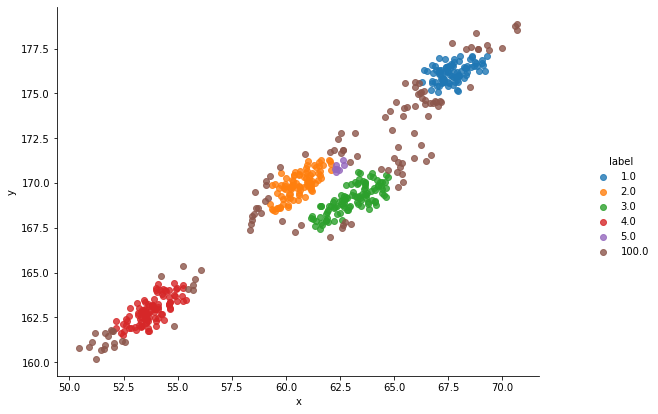

In [94]:
import seaborn as sns
import numpy as np

data_f11 = pd.DataFrame(np.concatenate((df2,np.array([label1]).T), axis = 1), columns = ["x","y","label"])
data_f11

sns.lmplot(x = 'x',y = 'y',data = data_f11, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()